This notebook is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/).

Author: 蘇嘉冠 feabries@gmail.com

Contributors: 蘇郁翔 asdfghjkl225836@gmail.com

# 人工智慧與工程應用實作 2023 作業四 Part I

請先登入 Google 帳號並且複製一份至你的 Google Drive，將複製的那份改名為 `hw4-1_學號.ipynb`，並且用複製的那份寫作業

## 鳶尾屬花卉分類（Multi-Class Classification）

延續課堂中學到的[鳶尾屬花卉分類](https://colab.research.google.com/drive/1bxzBnMgnTF5Fju6ATiBJRTNkPd47FDwQ?usp=sharing)，我們改成 Multi-Class Classification，目標為：
- `Iris-setosa`：label 為 `0`
- `Iris-versicolor`：label 為 `1`
- `Iris-virginica`：label 為 `2`

請修改以下程式碼，訓練新的模型後，求以下 metrics：
1. 若只考慮 `Iris-virginica` 的狀況下（亦即將 `Iris-virginica` 視為為 Positive，其他視為 Negative），其 Precision 為多少？誤差在 0.01 都算對（`virgin_only_precision`）
2. 若只考慮 `Iris-versicolor` 的狀況下（亦即將 `Iris-versicolor` 視為為 Positive，其他視為 Negative），其 Recall 為多少？誤差在 0.01 都算對（`versi_only_recall`）
2. 模型整體的 Precision（Macro Average）為多少？誤差在 0.01 都算對（`macro_precision`）
2. 模型整體的 F1 Score（Weighted Average）為多少？誤差在 0.01 都算對（`weighted_f1_score`）

說明：
- 請只修改有出現 `PLEASE MODIFY` 或 `PLEASE MODIFY CODE BELOW`，其他地方請勿更動
- 有些註解可以幫助你確認是否修改正確
- Metrics 的計算，請參閱 scikit-learn 的 [Classification metrics](https://scikit-learn.org/stable/modules/classes.html#classification-metrics)

In [ ]:
!pip install numpy pandas matplotlib scikit-learn

In [ ]:
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/AINTUT/code_2023/main/datasets/iris.csv",
)

print(df)

### Data Preprocessing

In [ ]:
#@title 修改區
input_features = [
    "petal length",
    "sepal length",
]
output_feature = "type"
labels = [
    "Iris-setosa",
    "Iris-versicolor",
] # PLEASE MODIFY: Add "Iris-virginica" to labels

In [ ]:
#@title 修改區
import numpy as np

data = df[df[output_feature] != "Iris-virginica"] # PLEASE MODIFY: Use the whole DataFrame.

x_data = data[input_features].to_numpy()
print(x_data)
print(x_data.shape) # The shape should be (150, 2).

In [ ]:
#@title 修改區
y_data = data[output_feature]
print(y_data)
y_data = np.where(y_data == labels[0], 0, 1) # PLEASE MOIDYF: Map "Iris-setosa" to 0, "Iris-versicolor" to 1, "Iris-virginica" to 2.
print(y_data)
print(y_data.shape) # The shape should be (150).

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_data,
    y_data,
    test_size=0.3,
    random_state=0,
)

print(x_train.shape) # The shape should be (105, 2).
print(x_test.shape) # The shape should be (45, 2).
print(y_train.shape) # The shape should be (105).
print(y_test.shape) # The shape should be (45).

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

print(x_train[:10])
print(x_train_std[:10])

### Data Visualization

In [ ]:
y_combined = np.concatenate((y_train, y_test))
x_combined_std = np.vstack((x_train_std, x_test_std))

print(y_combined.shape) # The shape should be (150)
print(x_combined_std.shape) # The shape should be (150, 2)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_data(x, y, labels, input_features, classifier=None, resolution=0.02):
    colors = (
        "green",
        "red",
        "lightgreen",
    )
    markers = (
        "x",
        "s",
        "o",
    )
    cmap = ListedColormap(colors[:len(np.unique(y))])

    if classifier is not None:
        x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
        x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(
            np.arange(x1_min, x1_max, resolution),
            np.arange(x2_min, x2_max, resolution),
        )
        z = classifier.predict(np.array([xx1.flatten(), xx2.flatten()]).T)
        z = z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=x[y == cl, 0],
            y=x[y == cl, 1],
            alpha=0.8,
            color=cmap(idx),
            marker=markers[idx],
            label=labels[cl],
        )

    plt.xlabel(input_features[0] + "[standardalized]")
    plt.ylabel(input_features[1] + "[standardalized]")
    plt.legend(loc="upper left")
    plt.tight_layout()

    plt.show()

如果你到這邊都修改對，下一步應該會出像這樣的圖

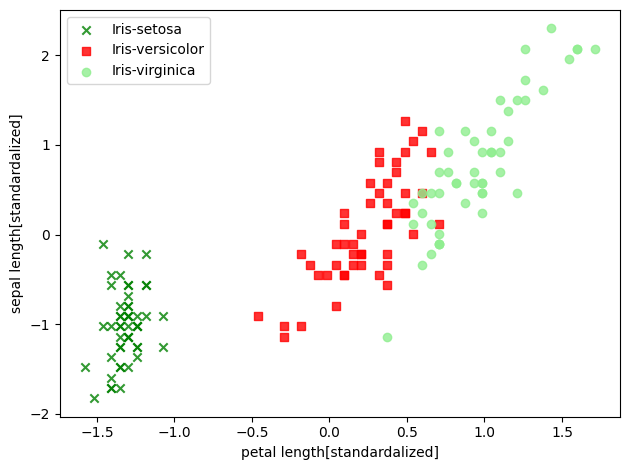

In [ ]:
plot_data(x_combined_std, y_combined, labels, input_features)

### Training

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(
    multi_class="multinomial",
    solver="sag",
    C=1000.0,
    random_state=0,
)
classifier.fit(x_train_std, y_train)

In [ ]:
probabilities = classifier.predict_proba(x_test_std[:3, :])
print(probabilities)
# The output should be:
# [[6.82165476e-10 6.87401348e-03 9.93125986e-01]
#  [4.30761647e-05 9.99891315e-01 6.56087314e-05]
#  [9.97381291e-01 2.61870933e-03 2.04894674e-20]]


# Predict the labels for the first three testing examples.
predictions = classifier.predict(x_test_std[:3, :])
print(predictions)
# The output should be:
# [2 1 0]

如果你到這邊都修改對，下一步應該會出像這樣的圖

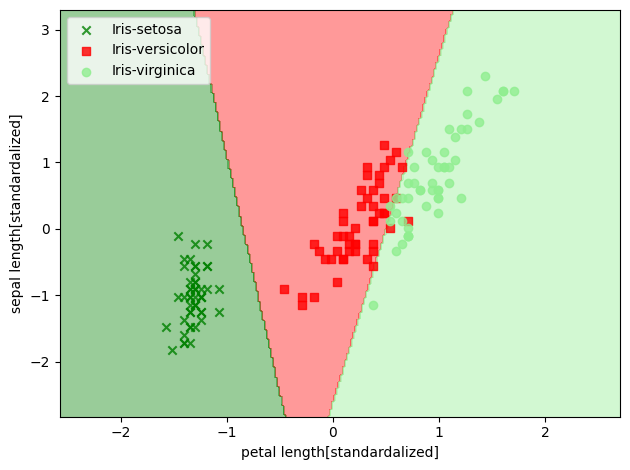

In [ ]:
plot_data(x_combined_std, y_combined, labels, input_features, classifier=classifier)

### Evaluation

In [ ]:
y_pred = classifier.predict(x_test_std)
print(y_pred)
print(y_test)

In [ ]:
def plot_confusion_matrix(conf_mat):
    plt.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)

    for idx_true in range(conf_mat.shape[0]):
        for idx_pred in range(conf_mat.shape[1]):
            plt.text(
                x=idx_pred,
                y=idx_true,
                s=conf_mat[idx_true, idx_pred],
                va="center",
                ha="center",
            )

    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")

    plt.show()    

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(conf_mat)

plot_confusion_matrix(conf_mat)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy = {}".format(accuracy)) # It should be 0.9333333333333333.

In [ ]:
#@title 修改區
# PLEASE MODIFY CODE BELOW.

virgin_only_precision = 0.0
versi_only_recall = 0.0
macro_precision = 0.0
weighted_f1_score = 0.0

print("Precision for Virginica only = {}".format(virgin_only_precision))
print("Precision for Versicolor only = {}".format(versi_only_recall))
print("Macro Precision = {}".format(macro_precision))
print("Weighted F1 Score = {}".format(macro_precision))